# Formalia:

All data can be found in our [github repo](https://github.com/ChristinaJeppesen/02805_socialgraphs_assignment2_data)


_____________
###### Restore Network
The data and edge list used witin this notebook can be found at https://github.com/ChristinaJeppesen/02805_socialgraphs_assignment2_data. Comic characters with absent links or missing/redirected pages are omitted within the dataset.

In order to make a solution for this assignment, we will start by restoring the network as it was created in week 4 as follows:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import networkx as nx
import os

# -- Restore the Marvel-DC network from current directory --

# set character directories 
marvel_dir = 'data/wikipages_marvel'
dc_dir = 'data/wikipages_dc'

# initialize a directed graph
init_DG = nx.DiGraph()

# function that adds the nodes corresponding to the downloaded 
# wiki-pages for each character in the given directory 
def add_characters_as_nodes(folder, universe):
    
    for f in os.listdir(folder):
        c, ext = os.path.splitext(f)
        # (node, node_attribute: universe='Marvel'|'DC'):
        init_DG.add_node(c.lower(), u=universe)

# add all the characters from 'marvel_dir' and 'dc_dir' as nodes
add_characters_as_nodes(marvel_dir, "Marvel")
add_characters_as_nodes(dc_dir, "DC")

# load the stored edges from base_dir
init_DG.add_edges_from(nx.read_edgelist("data/Marvel_DC_edges.edgelist.gz", create_using=nx.DiGraph).edges())

# discard truly minor characters (nodes with no in-out-degrees)
lcc = max(nx.weakly_connected_components(init_DG), key=len)
DG = init_DG.subgraph(lcc).copy()

# -- check stats -- #
marvel_nodes = [n for n,a in DG.nodes(data=True) if a['u'] == 'Marvel']
dc_nodes = [n for n,a in DG.nodes(data=True) if a['u'] == 'DC']

print("Check network stats:")
print(f' marvel nodes: {len(marvel_nodes)}')
print(f' dc nodes: {len(dc_nodes)}')
print(f' total nodes: {DG.number_of_nodes()}')
print(f' total edges: {DG.number_of_edges()}\n')

print(f'Example-node: {list(DG.nodes(data=True))[7:8]}')
print(f'Example-edge: {list(DG.edges())[6:7]}')


Check network stats:
 marvel nodes: 1580
 dc nodes: 426
 total nodes: 2006
 total edges: 29737

Example-node: [('adrienne_frost', {'u': 'Marvel'})]
Example-edge: [('3-d_man', 'yellow_claw')]


The above stats matches what was found in week 4, so we move on to the actual assignment using the restored network *DG*.
_____________

# Basic Stats

**(1)** Write a short paragraph describing the network. The paragraph should contain the following information

* **(1.1)** The number of nodes and links. 



In [4]:
print(f'DG-network contains:')
print(f' number of nodes: {DG.number_of_nodes()}')
print(f' number of links: {DG.number_of_edges()}')

DG-network contains:
 number of nodes: 2006
 number of links: 29737


* **(1.2)** The average, median, mode, minimum and maximum value of the network's in-degree.s And of the out-degrees.



In [5]:
import numpy as np
import statistics as st

# lists of in - and out-degrees of DG network 
DG_in_degrees = [DG.in_degree(n) for n in DG.nodes()]
DG_out_degrees = [DG.out_degree(n) for n in DG.nodes()]

# function that computes selected statistics of in- and out-degrees
def print_in_and_out_degree_statistics(in_degrees,out_degrees,netwok):
    
    print(f"{netwok}-network statistics:\n")

    # average, median, mode, minimum and maximum value of the in-degree
    print(" in-degree statistics of DG:")
    print(f'  mean:    {np.mean(in_degrees)}')
    print(f'  median:  {np.median(in_degrees)}')
    print(f'  mode:    {st.mode(in_degrees)}')
    print(f'  minimum: {np.min(in_degrees)}')
    print(f'  maximum: {np.max(in_degrees)}\n')

    # average, median, mode, minimum and maximum value of the out-degree 
    print(" out-degree statistics of DG:")
    print(f'  mean:    {np.mean(out_degrees)}')
    print(f'  median:  {np.median(out_degrees)}')
    print(f'  mode:    {st.mode(out_degrees)}')
    print(f'  minimum: {np.min(out_degrees)}')
    print(f'  maximum: {np.max(out_degrees)}\n')

print_in_and_out_degree_statistics(DG_in_degrees,DG_out_degrees,"DG")

DG-network statistics:

 in-degree statistics of DG:
  mean:    14.824027916251246
  median:  6.0
  mode:    1
  minimum: 0
  maximum: 465

 out-degree statistics of DG:
  mean:    14.824027916251246
  median:  10.0
  mode:    1
  minimum: 0
  maximum: 129



##### Description of network
The network is based on the DC and Marvel superhero dataset downloaded during week 4. The full dataset can be found in the *'data'* folder at https://github.com/ChristinaJeppesen/02805_socialgraphs_assignment2_data. Each .txt file in the dataset correspond to a character name from *Marvel List* and *DC List* provided in week 4 and contains the wiki-page text of the given character. Furtermore, the text files contains several hyperlinks. 

The network contains 2006 nodes each corresponding to the character names from the provided *Marvel List* and *DC List* of which a wiki-page was detected during week 4. Furthermore the network contains 29737 edges in total, each corresponding to a detected hyperlink in a characters' wiki-page. 

The network has an average number of in - and out-degrees of 14.82 and with an in-degree median of 6.0 and an out-degree median of 10.0, the distribution of the two degree types is not symmetic, and has more of the lower values in the first half of the degree-values, which is also indicated by a mode of 1 for both the in - and out-degrees. 

Since both the minimum in-degree and out-degree is 0, it means that the network contains nodes of characters that either do not have any links from another chacacter-wiki-page to the character itself, and contains nodes of characters that do not have any links from its wiki-page to other characters. It is also seen that the maximum in-degree of 465 is way higher than the maximum out-degree of 129, which means that some characters are mentioned much more in other character-wiki-pages than the character itself link to other characters. 
_____________

**(2)** We also want the degree distributions and a plot of the network

* **(2.1)** Create and visualize in- and out-going degree distributions as described in Lecture 4. Think about which axes you should use - loglog is great for power-law distributions, but not necessarily for Poisson-like degree distributions.

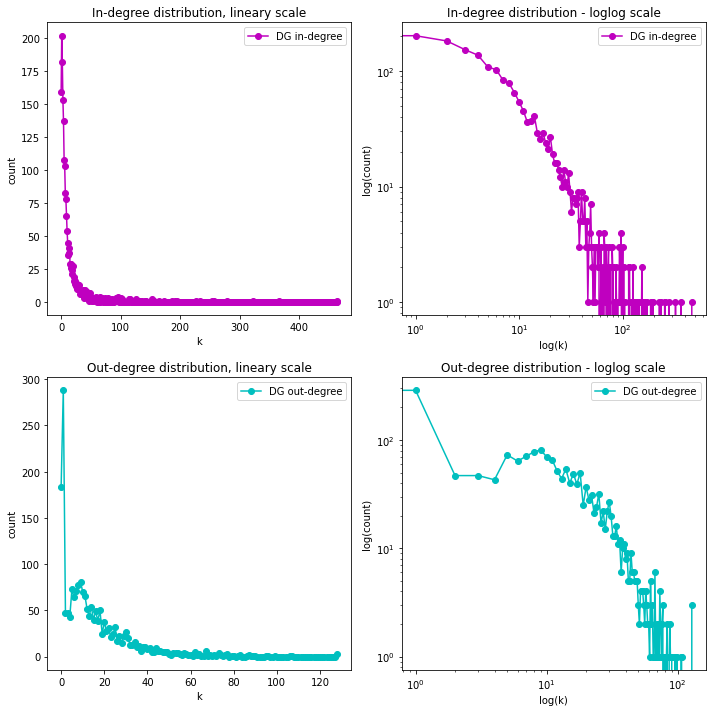

In [299]:
# extract the in - and out-degrees from the network
DG_in_degrees = [DG.in_degree(n) for n in DG.nodes()]
DG_out_degrees = [DG.out_degree(n) for n in DG.nodes()]

# bin the degrees
DG_in_his, DG_in_bin = np.histogram(DG_in_degrees, range(min(DG_in_degrees), max(DG_in_degrees)+1))
DG_out_his, DG_out_bin = np.histogram(DG_out_degrees, range(min(DG_out_degrees), max(DG_out_degrees)+1))

#  plot the degree destributions 
fig, axes = plt.subplots(2, 2, figsize = (10,10))

axes[0, 0].plot(DG_in_his,'mo-', label="DG in-degree")
axes[0, 0].set_ylabel('count')
axes[0, 0].set_xlabel('k')
axes[0, 0].set_title('In-degree distribution, lineary scale');
axes[0, 0].legend()

axes[0, 1].loglog(DG_in_his,'mo-', label="DG in-degree")
axes[0, 1].set_ylabel('log(count)')
axes[0, 1].set_xlabel('log(k)')
axes[0, 1].set_title('In-degree distribution - loglog scale');
axes[0, 1].legend()

axes[1, 0].plot(DG_out_his,'co-', label="DG out-degree")
axes[1, 0].set_ylabel('count')
axes[1, 0].set_xlabel('k')
axes[1, 0].set_title('Out-degree distribution, lineary scale');
axes[1, 0].legend()

axes[1, 1].loglog(DG_out_his,'co-', label="DG out-degree")
axes[1, 1].set_ylabel('log(count)')
axes[1, 1].set_xlabel('log(k)')
axes[1, 1].set_title('Out-degree distribution - loglog scale');
axes[1, 1].legend()

fig.tight_layout()
plt.show()

***Figure 1:*** *Visualization of the in- and out-degree distributions of the DG network. The top row shows the in-degree distributions plottet on a linary scale (left panel) and on a loglog scale (right panel). The bottom row shows the out-degree distributions plottet on a linary scale (left panel) and on a loglog scale (right panel). The distribution plots using different scales are provided to emphasize the difference in the in- and out-degree distributions.* 

From Figure 1 it is clear that there is a difference bewteen the in- and out-degree destributions. The in-degree distibution looks similar to a power-law distibution as the plot using the loglog scale (top row, right panel) resemples a straight line (for at least a part of it), whereas the out-degree distribution looks more similar to a poisson-like distribution as the plot using the linary scale (bottom row, left panel) more resemples a positively scewed line. This difference makes sence in the way that there is not really a physical constraint on how many references a character can have from another character, it mostly depend on how "popular" the character is and we therefore see that a few characters has a lot of incomming links. This means that a large part of the characters in the network link to the same character. On the other hand, we dont see the same high number of outgoing links from any of the characters. This might be because the number of outgoing links must come from the same wiki page, and since there is a correlation between the number of links and the length of a wiki page, there is a natural constraint to the number of outgoing links a character kan have. This means that the range of the number of outgoing links is narrower than the range of the incoming links, so there is a larger part of the characters in the network that link to the same number (a minor part) of characters in the network.


____

* **(2.2)** Estimate, report, and reflect on the slope and starting value of the incoming degree distribtion's power law using the tools described in Lecture 5 - and display the fit on top of your incoming degree-distribution plot.


In [ ]:
#!pip install powerlaw

In [316]:
import powerlaw

# get the slope of the fit
fit = powerlaw.Fit(DG_in_his, verbose=False)
alpha = fit.alpha
xmin = fit.xmin
xmax = fit.xmax
print(f'Estimated slope, alpha = {alpha}')
print(f'Starting value, xmin = {xmin}')
print(f'Endting value, xmax = {xmax}')

Estimated slope, alpha = 1.697758426820527
Starting value, xmin = 1.0
Endting value, xmax = None


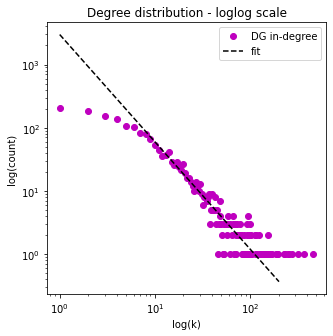

In [317]:
# fit a line to the in-degree distribution 
linx = np.linspace(1,max(DG_in_his), max(DG_in_his))
liny = [pow(k,-alpha)*np.exp(8) for k in linx]

# plot the fitted line on top of the in-degree destribution plot
fig, ax = plt.subplots(1, 1, figsize = (5,5))

ax.loglog(DG_in_his,'mo', label="DG in-degree")
ax.loglog(linx, liny, 'k--', label="fit")
ax.set_ylabel('log(count)')
ax.set_xlabel('log(k)')
ax.set_title('Degree distribution - loglog scale');
ax.legend()

plt.show()


***Figure 2:*** *Visualization of the in-degree distribution (purple dots) on a loglog scale along with the fitted power function (black dashed line).*

As seen in Figure 2, the in-degree distibution for the most part resemples a straight line (visualized by the fitted line) with a slope of XX and a starting value of 1. And with a starting value of 1, the estimated slope takes all the in-degrees into account when fitted. This means that the in-degrees of the network follows a power law, which has an influence on the groth of the network. When a network follows a power law with a slope larger than 1, new nodes tend to connect to the already highly connected nodes \[[1](#1)\]. In time, the most connected nodes will proberbly turn into super-hubs, where all new nodes will link to the node of the super-hub, which in this case means that in time, all new characters of the Marvel or DC universe will link to proberbly link to either Spider Man or Super Man (forund as the most connected nodes in the two universes respectively during week 4).  
____

* **(2.3)** Plot the network using the Force Atlas algorithm as described in Lecture 5.

(Friendly hint: Remember figure captions.)

In [37]:
#!pip install fa2

In [77]:
from fa2 import ForceAtlas2

# turn DG into an undirected graph
G = DG.to_undirected()

# create a size map such that the node-size depend on degree
d = dict(G.degree)
size_map = [v/4 for v in d.values()]

# edge-color depend on universe, all edges are pt yellow 
#color_a = 'red'
#color_b = 'green'
#color_c = 'yellow'

color_map_nodes = ['red' if a['u'] == 'Marvel' else 'green' for n,a in G.nodes(data=True)]
#color_map_edges = [color_c if u1 == "Marvel" and u2 =="Marvel" else color_c if u1 == "DC" and u2 =="DC" else color_c for ((n1,u1,w1),(n2,u2,w2)) in G.edges] 


In [96]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=0.1, # 1.2
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=0.0, ##1.0

                        # Log
                        verbose=False)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [22:09<00:00,  1.50it/s]

BarnesHut Approximation  took  28.28  seconds
Repulsion forces  took  1291.83  seconds
Gravitational forces  took  0.51  seconds
Attraction forces  took  1.28  seconds
AdjustSpeedAndApplyForces step  took  2.41  seconds


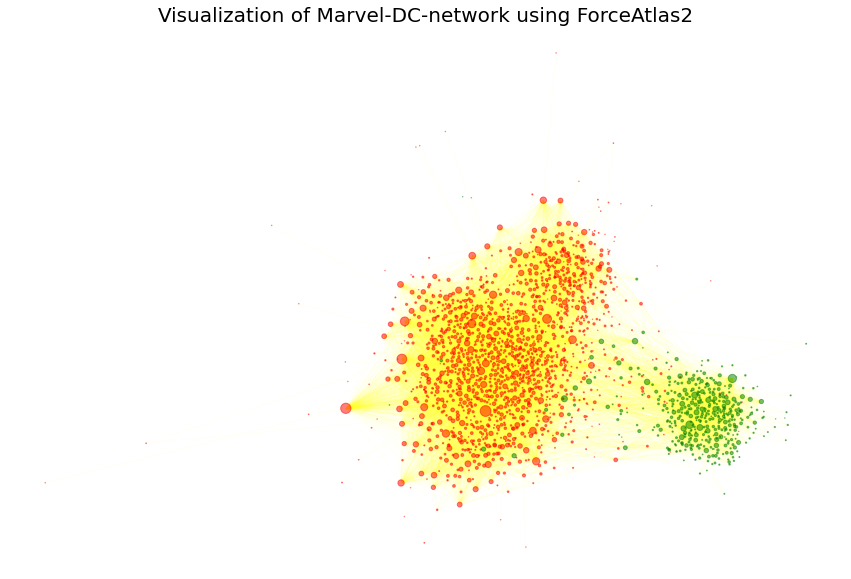

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

nx.draw_networkx_nodes(G, 
                       positions, 
                       node_size=size_map, 
                       node_color=color_map_nodes, 
                       alpha=0.5)

nx.draw_networkx_edges(G, 
                       positions, 
                       edge_color="yellow", 
                       alpha=0.04)
plt.axis('off')
plt.title("Visualization of Marvel-DC-network using ForceAtlas2",fontsize=20)
plt.show()

***Figure 3:*** *Visualization of the undirected version of the Marvel-DC-network using the `ForceAtlas2` package. Green nodes corresponds to characters of the DC universe, while red nodes correspond to the characters of the Marvel universe. The links between the characters are shown with yellow edges.*
_________

# Communities

> We decided to focus on the **Marvel** universe for this exercise

In [35]:
from community import community_louvain as cl

In [13]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import json
import re
import numpy as np
from nltk.corpus import stopwords
import pandas as pd
stop_words = set(stopwords.words('english'))
stop_words.add('ref') # used frequently in wiki pages 


> First the subgraph defined by all Marvel nodes and their connections is created by the following helper function. 

In [14]:
# create generator
def create_universe_subgraph(DG,universe):
    nodes = (
        node
        for node, data
        in DG.nodes(data=True)
        if data.get("u") == universe
    )
    subgraph = DG.subgraph(nodes)
    lcc = max(nx.weakly_connected_components(subgraph), key=len)
    subgraph = subgraph.subgraph(lcc).copy()

    return subgraph

In [15]:
marvel_sg = create_universe_subgraph(DG,"Marvel")
G = marvel_sg.to_undirected()

#### Modularity 

The value of modularity for a network is computed by 
$$
\Large
M = \sum^{n_c}_{c=1} \left[\frac{L_c}{L} - \left(\frac{k_c}{2L}\right)^2\right] \tag{9.12}
$$
It is a measure of how well the network separates into communities. If the modularity, $M$, is large this indicates that the Network has dense connections between nodes in the same community and sparse connetions between nodes from seperate communities.   

In the case of the Marvel DC universe network, this is computed as seend below 

In [31]:
def modularity(DG, communities):
    # c is the community i.e. C = {Marvel, DC}
    # L is the number of links in the network 
    # Lc is the no. links in the community 
    # k_c is the total degree of the nodes in this community.
    M = 0
    L = DG.number_of_edges()
    for community in communities: 
        L_c = len([e for e in DG.edges() if (DG.nodes[e[0]])['u'] == community and (DG.nodes[e[1]])['u'] == community])
        k_c = sum([DG.degree(n) for n,a in DG.nodes(data=True) if a['u'] == community])
        M += (L_c/L) - (k_c/(2*L))**2
    return M 

In [32]:
modularity(DG,['Marvel','DC'])

0.25575275987576856

A modularity value of $0.26$ thus tells us that the network does not have dense connections between nodes from the same community and also not sparse connections between nodes from different communities. Maybe this is different when we start using algorithms to find communties inside the network. 

#### Identification of communities 
The communities where identified via the Louvain-algorithm, which is described by Vincent D. Blondel et al. \[[2](#2)\].   
The Algorithm is a heuristic method and is computed by optimizing the modularity of a Network.

In [36]:
partition = cl.best_partition(G)

> For optimal visualization of the communities the forceatlas algorithm was used

The modularity for the network based on these communties has been calculated below, it cannot be compared to the modularity above, since this is is solely computed for the supgraph of the Marvel universe. 



In [46]:
M = 0
L = DG.number_of_edges()
communities = np.unique(list(partition.values()))
for community in communities: 
    L_c = len([e for e in marvel_sg.edges() if (partition[e[0]]) == community and (partition[e[1]]) == community])
    k_c = sum([marvel_sg.degree(n) for n,a in marvel_sg.nodes(data=True) if partition[n] == community])
    M += (L_c/L) - (k_c/(2*L))**2
M

0.33985838234325366

The value is a little higher but still not very good 
Now we will try to create a good visualization by using the `ForceAtlas2` algorithm. 

In [44]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        #adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        #edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.5, # 1.2
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        #strongGravityMode=False,
                        gravity=10, ##1.0

                        # Log
                        #verbose=True
                        )

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=nx.spring_layout(G), iterations=2000)


100%|███████████████████████████████████████████████████████████████████████████| 2000/2000 [02:26<00:00, 13.61it/s]

BarnesHut Approximation  took  24.44  seconds
Repulsion forces  took  116.03  seconds
Gravitational forces  took  0.46  seconds
Attraction forces  took  1.14  seconds
AdjustSpeedAndApplyForces step  took  1.97  seconds


> Below we specify the colormap for the network

In [45]:
n_c = np.max(list(partition.values())) +1
d = dict(G.degree)

colorbar = plt.cm.get_cmap('hsv', n_c)
colors = colorbar(np.arange(0,1,1/n_c))
colormap = dict(zip(np.arange(0,n_c,1), colors))
color_map_nodes = [colormap[val] for val in partition.values() ]

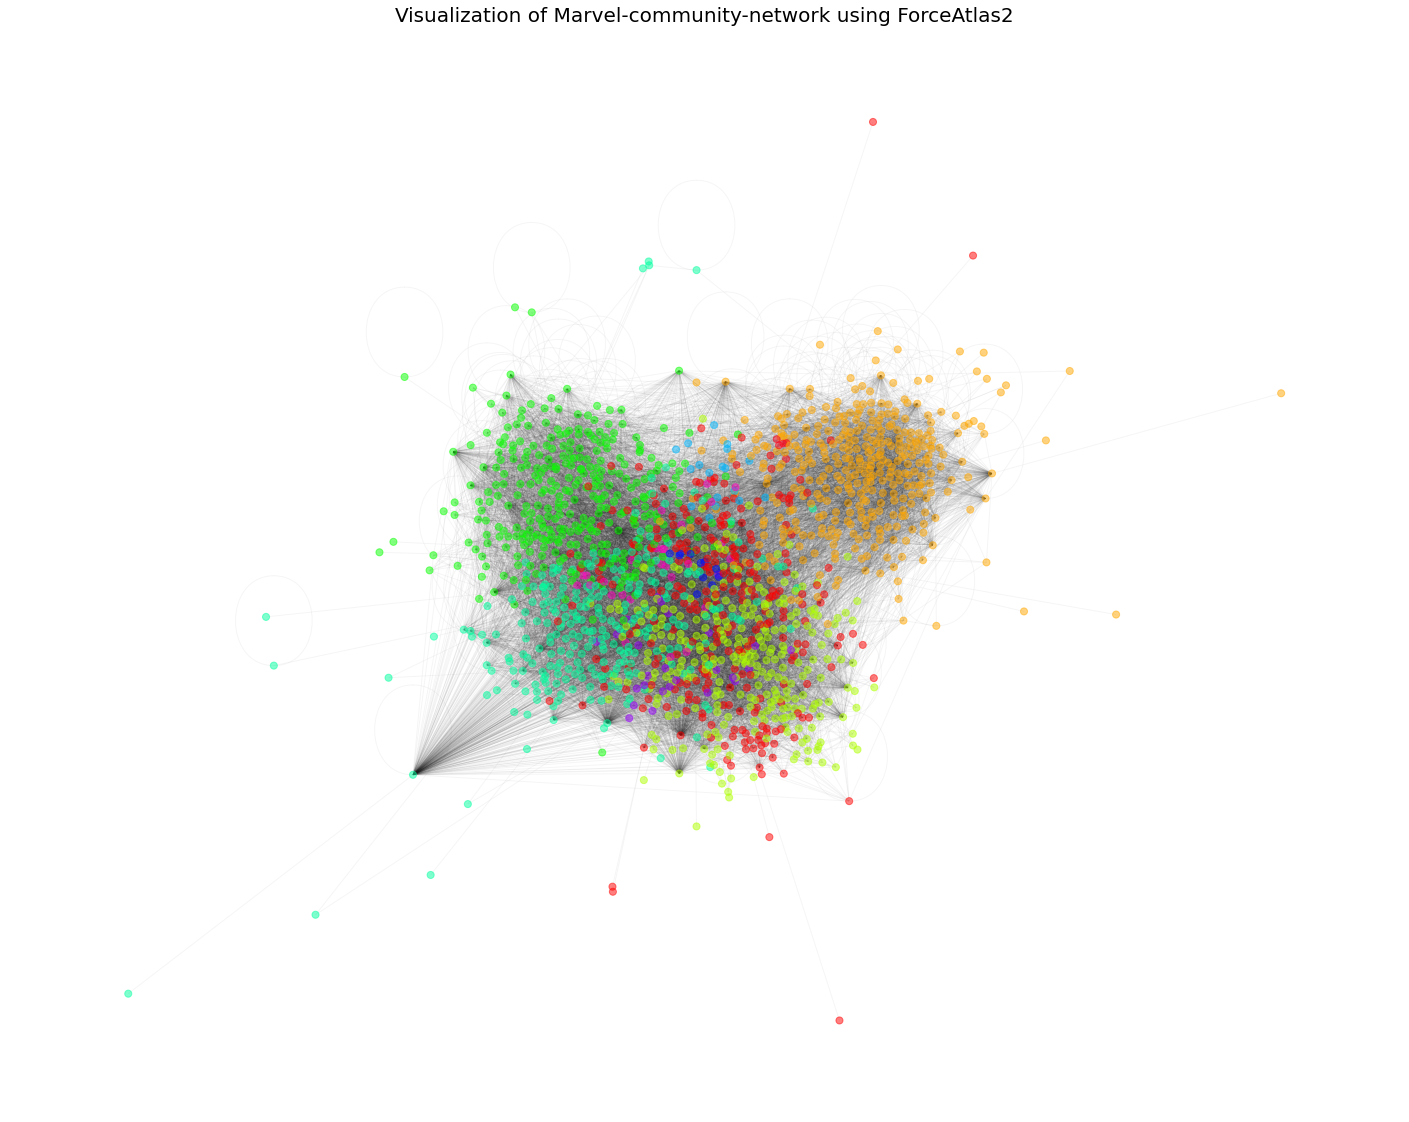

In [37]:
plt.figure(figsize=(25,20))

nx.draw_networkx_nodes(G, 
                       positions, 
                       node_size=50, 
                       node_color=color_map_nodes, 
                       alpha=0.5)

nx.draw_networkx_edges(G, 
                       positions, 
                       edge_color="k", 
                       alpha=0.04,
                       width = 1.0
                      )
plt.axis('off')
plt.title("Visualization of Marvel-community-network using ForceAtlas2",fontsize=20)
#plt.legend(np.arange(0,n_c+1))
plt.show()

***Figure 4:*** *Visualization of the undirected version of the Marvel-network using the `ForceAtlas2` package. Each color corresponds to a separate community which was found using the Louvain-algorithm. As indicated by the modularity, the network is not very good at having sparse connections in between nodes from the same community, and sparse sonnections between nodes from different communities.*
_________

#### TF-IDF

In the following part we will consider the 10 largest communities found by the algorithm, if there are more than 10.   
The text from each community will pe processed in the following way 
1. all wikitext is concatenated for each community. 
2. the text is preprocessed and split into words 
3. a word frequency count is performed for each community 
4. The TF-IDF is computed for the whole Marvel Universe
> For this part we created some helper functions which were used for the TF-IDF part

The TF-IDF stands for *term frequency-inverse document frequency*. It is a method of evaluation, to determine how relevant a word is in the context of a specified document wrt. a collection of documents. In our case a single document represents one community, whereas the collection of documents/communties is the Marvel universe.   
There are two relevant values for the computation of TF-IDF, those are 
1. TF(Term Frequency), that is the no. times a word appears in a document, this value is therefore indexed by i, the word, and j, the document.
2. IDF(Inverse-Document Frequency), that is the inverse of the no. documents/communities containing the word. 


##### Helper Functions
The functions in this section where used to solve the TF-IDF task, and made to safe space in the notebook 

In [50]:
def extract_maintext_wikipage(text_path, stemming = "porter"):
    """
    Universe:      String either DC or Marvel/M
    CharacterName: String Character Name
    WikiLinkr:     String WikiLink for Character
    """
    
    with open(text_path) as f:
        text = json.load(f)

    # extract all raw text visible on wiki page    
    pageid = list(text['query']['pages'].keys())[0]
    if "missing" in text['query']['pages'][pageid]:
        return None
    wikitext = text['query']['pages'][pageid]['revisions'][0]['*']
 
    #do not include redirection files
    if wikitext[:9] == '#REDIRECT':
        return None
 
    #consider defining end of text
    
    #Extract main text, i.e. ignore infobox
    start_of_maintext = f"\'\'\'" #{full_name}\'\'\'"
    idx_start_of_maintext = wikitext.find(start_of_maintext)
    maintext = wikitext[idx_start_of_maintext:].lower()    

    return maintext

In [58]:
def create_Universe_community_texts(Universe, community):
    
    if Universe.lower() == "m":
        Universe = "marvel"
    else: 
        Universe = Universe.lower()
        
    txt_files = os.listdir(f"data/wikipages_{Universe}")
    community_text = []
    for i, txt in enumerate(txt_files):
        if txt != ".ipynb_checkpoints":
            if txt.split('.')[0].lower() in community:
                text_path = f"data/wikipages_{Universe}/{txt}"
                maintext = extract_maintext_wikipage(text_path)
                if maintext != None:
                    community_text.append(maintext)
    
    community_text = " ".join(community_text)
    community_words = pre_process_text(community_text)
    return community_words

In [52]:
def pre_process_text(text,stemming = None):
    #extract all words and safe as list
    words = re.split(r'\W+', text)
    
    #lemmatize word 
    if stemming == "porter":
        stemmer = nltk.PorterStemmer()
    elif stemming == "lanchester":
        stemmer = nltk.LancasterStemmer()
    
    if stemming != None:
        words = [stemmer.stem(w) for w in words if not w in stop_words ]
    else:
        words = [w for w in words if not w in stop_words ]
        
    return words


In [53]:
def create_idf_universe(community_words):
    #INPUT
    #  - community_words: list of wordlists one word list represents one community in universe
    #OUTPUT
    # - idf_community: the idfs for the universe, given as a list of dicts, one dict for each community
    # - corpus: all words in the community
    idf_universe = []
    corpus = set()
    for words in community_words:
        fdist = nltk.FreqDist(words)
        #fdist.pop("'")
        idf_universe.append(fdist) 
        corpus.update(list(fdist.keys()))

    return idf_universe, corpus


In [54]:
def community_tf_idf(idf_universe, corpus):
    N = len(idf_universe) # total number of communities in universe 
    
    # compute df_i: number of character pages containing word i
    df = dict.fromkeys(corpus,0)
    for word in corpus:
        for fdist in idf_universe:
            if word in fdist:
                df[word] += 1
    
    tfidf_dicts = []
    for fdist in idf_universe: 
        temp_dict = fdist.copy()
        for word in fdist:
            temp_dict[word] = fdist[word]*np.log(N/df[word])
        tfidf_dicts.append(temp_dict)
    return tfidf_dicts

---
#### TF-IDF of the marvel universe

In [59]:
Universe = "marvel"
n_c = np.max(list(partition.values())) +1
communities = [[key for key,val in zip(partition.keys(),partition.values()) if val == i] for i in range(n_c)]

docs = [ create_Universe_community_texts(Universe, community) for community in communities]

idf_universe, corpus = create_idf_universe(docs)

tfidf_dicts =community_tf_idf(idf_universe, corpus)

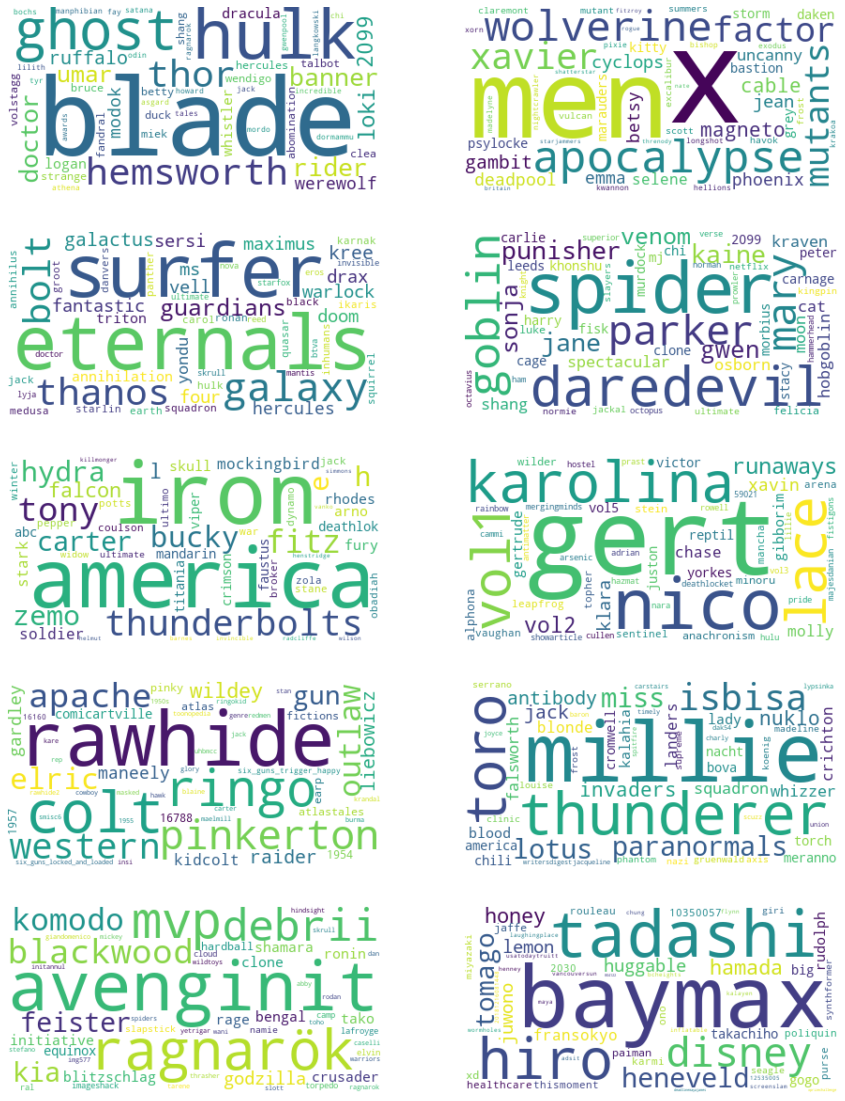

In [60]:
fig,axs = plt.subplots(5,2,figsize = (15,20))
axs_f = axs.flatten()
for i in range(len(tfidf_dicts)):
    wc = WordCloud(background_color="white", max_words=50).generate_from_frequencies(tfidf_dicts[i])
    # show
    axs_f[i].imshow(wc, interpolation="bilinear")
    axs_f[i].axis("off")

plt.show()

***Figure 5:*** *WordClouds for the 10 largest communties of the Marvel Universe. It is not just gibberish, as the WordClouds with high TF-IDF values for 'X' and 'men' also contain other words connected to the X-men Marvel series, such as mutants and Wolverine. Same holds for the one containing America and Tony, probably referring to the community containing Tony Starck and Captain America. However not all of them seam to make sense, which can also be related to the large difference in no. documents connected to those communties. *
_________

# Sentiment

First calculate the sentiment for all character pages. Calculate the mean value of the sentiment and the 10th and 90th percentile values for the sentiment. Then create a nice histogram displaying the distribution of sentiment values for all pages. Indicate the mean, etc on that histogram.

Now grab the good/bad character names ([from this file](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2022/b1668fe5fbea0765ed6f9cf896bfaf208a13765b/files/wiki_meta_data.csv), see Week 8 for details) and calculate the same stats for only good/bad characters; also plot the histograms for the good/bad group and indicate the values of the mean, etc.

Finally use the label permutation test (see Week 5) to investigate the two hypotheses below
* H1: Good characters have a higher averge value for sentiment than a similarly sized set of randomly selected characters.
* H2: Bad characters have a lower average value for sentiment than a similarly sized set of randomly selected characters.

Write a short paragraph reflecting on your findings.

In [1]:
#import the labmit file
import re 
import urllib.request
import pandas as pd 
import nltk
import os
import json

path = "data/labmit.txt"
df = pd.read_csv(path, sep='\t')
df

,word,happiness_rank,happiness_average,happiness_standard_deviation,twitter_rank,google_rank,nyt_rank,lyrics_rank
0,laughter,1,8.50,0.9313,3600,--,--,1728
1,happiness,2,8.44,0.9723,1853,2458,--,1230
2,love,3,8.42,1.1082,25,317,328,23
3,happy,4,8.30,0.9949,65,1372,1313,375
4,laughed,5,8.26,1.1572,3334,3542,--,2332
...,...,...,...,...,...,...,...,...
10217,murder,10218,1.48,1.0150,2762,3110,1541,1059
10218,terrorism,10219,1.48,0.9089,--,--,3192,--
10219,rape,10220,1.44,0.7866,3133,--,4115,2977
10220,suicide,10221,1.30,0.8391,2124,4707,3319,2107


In [2]:
#calculate sentiment for all dc characters
dc_path = "data/wikipages_dc"
marvel_path = "data/wikipages_marvel"

#get all filenames of superheros in dc
dir_list = os.listdir(dc_path)
dir_marvel_list = os.listdir(marvel_path)
dir_list.append(dir_marvel_list)

In [32]:
#implement sentiment function 
def sentiment(ls):
    total = 0
    f_i = 0
    f_j = 0
    ls = nltk.word_tokenize(ls)
    tokens = [token.lower() for token in ls] # make tokens lowercase
    word_dict = nltk.FreqDist(tokens)
    for k,v in word_dict.items():
        if any(df.word == k):
            f_j += v
    for k,v in word_dict.items():
        try:
            res = df.loc[df['word'] == k, 'happiness_average'].iloc[0]
            avg = (res*v)
            total += avg
        except:
            total = total + 0
    
    if f_j != 0:
        return total/f_j
    else: 
        return 0

In [ ]:
paths = [marvel_path, dc_path]

ch = {}
for universe in paths:
    print(universe)   
    dir_list = os.listdir(universe)
    for i in range(len(dir_list)):
        print(dir_list[i])
        try:
            f = open(universe + '/'+ dir_list[i])
            data = json.load(f)
            t = data['query']['pages']
            text = json.dumps(t)
            if dir_list[i] not in ch:
                ch[dir_list[i]] = sentiment(text)
            else:
                continue
        except:
            continue

    for k,v in ch.items():
        print(f'character: {k}, sentiment_value= {v}')

data/wikipages_marvel
Henry_Pym.txt
Speed.txt
Slapstick.txt
Human_Top.txt
Guardian.txt
Riptide.txt
Doughboy.txt
Masked_Raider.txt
Aldrich_Killian.txt
Leo.txt
Locus.txt
Dexter_Bennett.txt
Warrior_Woman.txt
Murmur.txt
Lord_Dark_Wind.txt
Leir.txt
Spyne.txt
Shadow_King.txt
Uatu.txt
Free_Spirit.txt
Hellrazor.txt
Thing.txt
Siryn.txt
Namora.txt
Diablo.txt
Supernova.txt
Radius.txt
Opsidian.txt
Robert_Maverick.txt
Johnny_Dee.txt
Squid.txt
Equinox.txt
Matthew_Risman.txt
Man-Beast.txt
Spidercide.txt
Gladiator.txt
Henrietta_Hunter.txt
Penance.txt
Phobos.txt


In [27]:
import json
#store_json = json.dumps(ch)
#with open('test_new_all_chars.json', 'w') as f:
#    f.write(store_json)
# load calculated sentiment values into project
# JSON file
f = open ('data/test_new_all_chars.json', 'r')
  
# Reading from file
data = json.loads(f.read())

In [4]:
ch = data
all_characters = data

In [5]:
#get all sentiment values from ch
all_values = list(ch.values())
# calculate the avg value
def avg_of_list(all_values):
    avg = sum(all_values) / len(all_values)
    return avg

print(avg_of_list(all_values))

5.444859468284755


In [7]:
#calculate the 10th and 90th percentile of sentiment
import numpy as np
arr = np.array(all_values)
tenth_p = np.percentile(arr, 10)
ninety_p = np.percentile(arr, 90)

print(f'10th percentile {tenth_p}, 90th percentile {ninety_p} ')

10th percentile 5.282674933904071, 90th percentile 5.667238095238095 


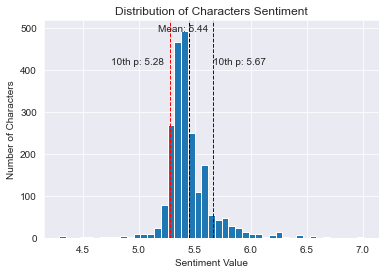

In [8]:
#make histogram 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")


plt.hist(all_values, bins =45)
plt.axvline(avg_of_list(all_values), color='k', linestyle='dashed', linewidth=1)
plt.axvline(tenth_p, color='r', linestyle='dashed', linewidth=1)
plt.axvline(ninety_p, color='b', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(avg_of_list(all_values)*0.95, max_ylim*0.95, 'Mean: {:.2f}'.format(avg_of_list(all_values)))
plt.text(tenth_p*0.90, max_ylim*0.8, '10th p: {:.2f}'.format(tenth_p))
plt.text(ninety_p*1, max_ylim*0.8, '10th p: {:.2f}'.format(ninety_p))
plt.title('Distribution of Characters Sentiment')
plt.xlabel('Sentiment Value')
plt.ylabel('Number of Characters')

plt.show()

# Good and Bad characters 

In [9]:
import urllib.request

url = 'https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2022/b1668fe5fbea0765ed6f9cf896bfaf208a13765b/files/wiki_meta_data.csv'
response = urllib.request.urlopen(url)
gb = pd.read_csv(response)
gb

,Unnamed: 0,CharacterName,WikiLink,universe,woman,man,good,bad
0,0,Abomination,Abomination (character),Marvel,0,1,0,1
1,1,Absorbing Man,Absorbing Man,Marvel,0,1,0,1
2,2,Achebe,Achebe (comics),Marvel,0,0,0,0
3,3,Agent,Agent (comics),Marvel,0,1,1,0
4,4,Agent X,Agent X (Marvel Comics),Marvel,0,1,1,0
...,...,...,...,...,...,...,...,...
2298,2298,Xov,Xov (Action Comics 242),DC,0,0,0,0
2299,2299,XS,XS (comics),DC,0,0,0,0
2300,2300,4-D,International Ultramarine Corps#Founding membe...,DC,0,0,0,0
2301,2301,500Z-Q,Hero Hotline#Support crew,DC,0,0,0,0


In [10]:
#take character list and return list of sentiment values
def sentiment_lookup(cl):
    values = [] 
    for p in cl:
        if p in cd:
            values.append(cd[p])
        else:
            continue
    return values

In [11]:
good = (gb.loc[gb['good'] == 1, 'WikiLink']).tolist()
bad = (gb.loc[gb['good'] == 0, 'WikiLink']).tolist()

def format_wikilink(cl):
    f = []
    for c in cl:
        c = c.replace(' ','_')
        f.append(c)
    return f

#remove .json from key in dictionary
cd = { k.replace('.txt', ''): v for k, v in all_characters.items() }


good = format_wikilink(good)
bad = format_wikilink(bad)


In [12]:

good_v = sentiment_lookup(good)
bad_v = sentiment_lookup(bad)

print(f'avg of good is {avg_of_list(good_v)} avg of bad is {avg_of_list(bad_v)}')

good_arr = np.array(good_v)
g_tenth_p = np.percentile(good_arr, 10)
g_ninety_p = np.percentile(good_arr, 90)

bad_arr = np.array(bad_v)
b_tenth_p = np.percentile(bad_arr, 10)
b_ninety_p = np.percentile(bad_arr, 90)


print(f'10th percentile {g_tenth_p}, 90th percentile {g_ninety_p}, len={len(good_v)} ')
print(f'10th percentile {b_tenth_p}, 90th percentile {b_ninety_p}, len={len(bad_v)} ')


avg of good is 5.424769909323079 avg of bad is 5.390373624641654
10th percentile 5.305587851158386, 90th percentile 5.5239333281403695, len=198 
10th percentile 5.275587506624988, 90th percentile 5.547595946920976, len=807 


In [26]:
# The 10 characters with the lowest sentiment values are
ls = sorted(all_characters, key=all_characters.get, reverse=False)[:10]

for c in ls:
    print(f'character= {c}, c= {all_characters[c]}')


character= Vizacacha.txt, c= 4.29
character= Xenofobe.txt, c= 4.29
character= Xeo.txt, c= 4.29
character= Volthoom.txt, c= 4.29
character= X'_Hal.txt, c= 4.5
character= X-Bomb_Betty.txt, c= 4.58
character= Death_Adder.txt, c= 4.704444444444444
character= Crimson_Curse.txt, c= 4.74
character= X.txt, c= 4.750000000000001
character= Shortpack.txt, c= 4.7749999999999995


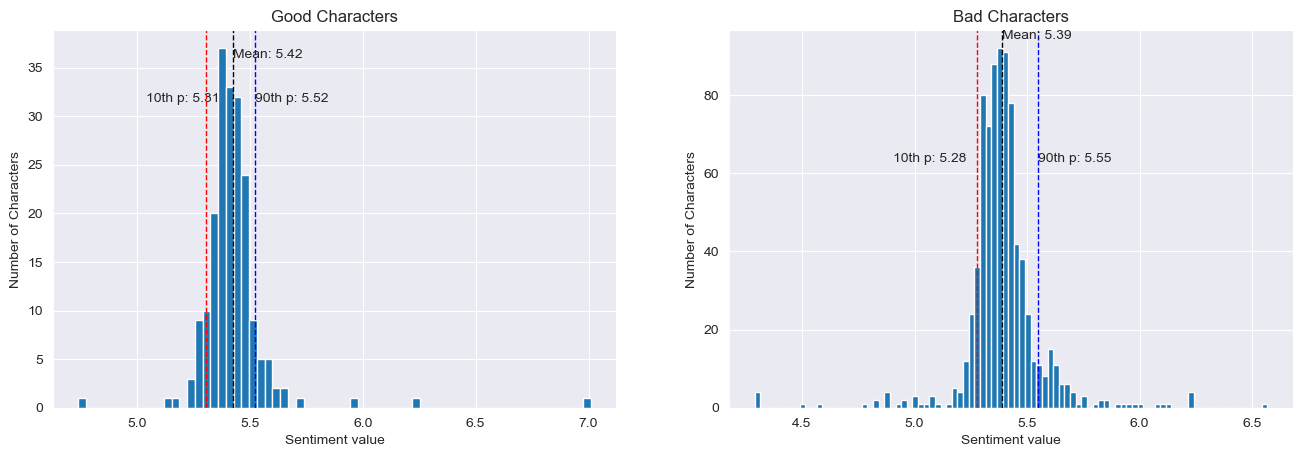

In [16]:
sns.set_style("darkgrid")

f, (ax1, ax2) = plt.subplots(1,2, figsize = (16,5),dpi=100)


ax1.hist(good_v, bins='auto')
ax1.axvline(avg_of_list(good_v), color='k', linestyle='dashed', linewidth=1)
ax1.axvline(g_tenth_p, color='r', linestyle='dashed', linewidth=1)
ax1.axvline(g_ninety_p, color='b', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
ax1.text(avg_of_list(good_v)*1.0, 40*0.9, 'Mean: {:.2f}'.format(avg_of_list(good_v)))
ax1.text(g_tenth_p*0.95, 35*0.9, '10th p: {:.2f}'.format(g_tenth_p))
ax1.text(g_ninety_p*1, 35*0.9, '90th p: {:.2f}'.format(g_ninety_p))
ax1.title.set_text('Good Characters')
ax1.set_ylabel('Number of Characters')
ax1.set_xlabel('Sentiment value')

ax2.hist(bad_v, bins='auto')
ax2.axvline(avg_of_list(bad_v), color='k', linestyle='dashed', linewidth=1)
ax2.axvline(b_tenth_p, color='r', linestyle='dashed', linewidth=1)
ax2.axvline(b_ninety_p, color='b', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
ax2.text(avg_of_list(bad_v)*1.0, 105*0.9, 'Mean: {:.2f}'.format(avg_of_list(bad_v)))
ax2.text(b_tenth_p*0.93, 70*0.9, '10th p: {:.2f}'.format(b_tenth_p))
ax2.text(b_ninety_p*1, 70*0.9, '90th p: {:.2f}'.format(b_ninety_p))
ax2.title.set_text('Bad Characters')
ax2.set_ylabel('Number of Characters')
ax2.set_xlabel('Sentiment value')


plt.show()

In [168]:
import random

### 1 split into good and bad superheros
print(len(good_arr))
print(len(bad_arr))
#avg sentiment for good and bad characters 
print(f'good={avg_of_list(good_arr)}, bad={avg_of_list(bad_arr)}')

#compare avg of good and bad characters 
#H1: Good characters have a higher averge value for sentiment than a 
#similarly sized set of randomly selected characters.

def generate_random(ls, all_v):
    h1 = []
    for i in range(1000):
        
        for i in range(len(ls)):
            h1.append(random.choice(all_v))
        
        
    return h1

h1 = generate_random(good_arr, all_values)
h2 = generate_random(bad_arr, all_values)

print(f'good={avg_of_list(good_arr)}, generated_avg={avg_of_list(h1)}')
print(f'bad={avg_of_list(bad_arr)}, generated_avg={avg_of_list(h2)}')   

198
807
good=5.424769909323079, bad=5.390373624641654
good=5.424769909323079, generated_avg=5.445089038084374
bad=5.390373624641654, generated_avg=5.444802075423744


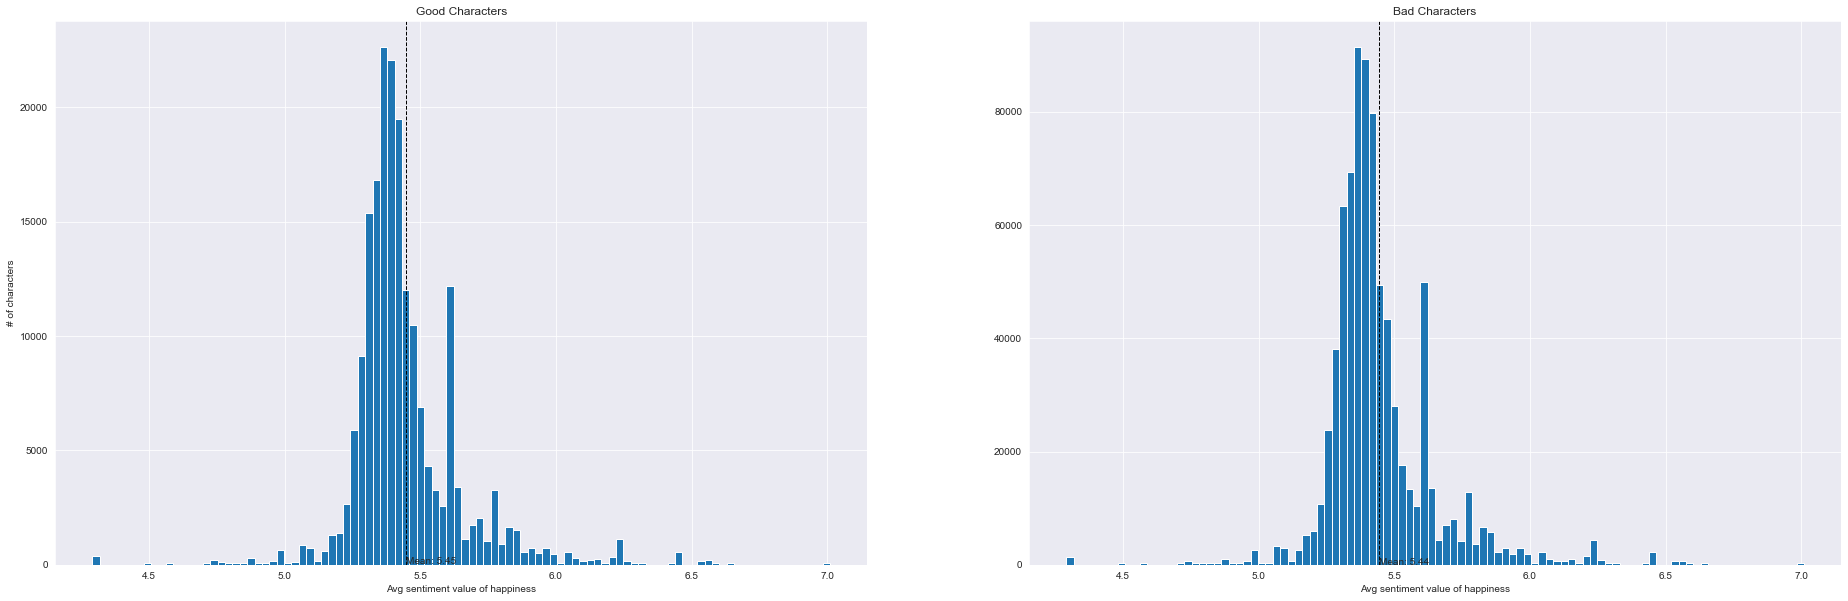

In [179]:
sns.set_style("darkgrid")
f, (ax1, ax2) = plt.subplots(1,2, figsize = (32,10))

ax1.hist(h1, bins =100)
ax1.title.set_text('Good Characters')

ax1.axes.set_ylabel('# of characters')
ax1.axes.set_xlabel('Avg sentiment value of happiness')
ax2.hist(h2, bins =100)
ax2.title.set_text('Bad Characters')
ax2.axes.set_xlabel('Avg sentiment value of happiness')

ax1.axvline(avg_of_list(h1), color='k', linestyle='dashed', linewidth=1)
ax2.axvline(avg_of_list(h2), color='k', linestyle='dashed', linewidth=1)


#min_ylim, max_ylim = plt.ylim()
ax1.text(avg_of_list(h1)*1.0, 50,'Mean: {:.2f}'.format(avg_of_list(h1)))
ax2.text(avg_of_list(h2)*1.0, 50,'Mean: {:.2f}'.format(avg_of_list(h2)))

plt.show()

After having done the permutation test a 1000 the above two histograms show the distribution of avg sentiment for the happiness value. When comparing to the original histogram and plots. We see that the plots are similar and that the avg is close to original value. We can see that we get some more extreme cases of the min value of the sentiment. Where the sentiment for bad characters have more events with a higher sentiment value than the original the mean is roughly the same.    

## Bibliography
<a id='1'></a>
[1]    Albert-László Barabási. Network Science. url: http://networksciencebook.com/. (accessed: 27.9.2022).